# Lateral Gene Transfer - Pipeline Analysis

## Checking Number of CPU's available to Docker container

In [347]:
!cat /proc/cpuinfo | awk '/^processor/{print $3}' | tail -1

23


## Install Utilities

In [2]:
!sudo apt-get update -y --quiet -qq

In [ ]:
!sudo apt-get install -y --quiet -qq tree libcurl4-openssl-dev zlib1g-dev samtools

## Install Libraries

In [79]:
!pip install --quiet biopython pysam missingno

## Import Libraries

In [77]:
# Import Standard Python Libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

In [82]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Genomics
from Bio import SeqIO

## Helper Functions

## Analyze Datasets

In [62]:
%%bash
for filename in `ls ../cromwell-final-outputs/*donor*bam_complex.bam_count.txt`
do
    echo `basename $filename .bam_complex.bam_count.txt` `cat "$filename"` 
done 

donor_MMd_MMr 81862
donor_MMd_MUr 6
donor_MMd_UUr 28608
donor_MUd_MMr 762
donor_MUd_UMr 94
donor_MUd_UUr 3526
donor_UMd_MMr 42
donor_UMd_MUr 38
donor_UMd_UUr 792
donor_UUd_MMr 20849750
donor_UUd_MUr 37542
donor_UUd_UMr 410
donor_UUd_UUr 51064


In [63]:
%%bash
for filename in `ls ../cromwell-final-outputs/*recipient*bam_complex.bam_count.txt`
do
    echo `basename $filename .bam_complex.bam_count.txt` `cat "$filename"` 
done 

recipient_MMd_MMr 81862
recipient_MMd_MUr 6
recipient_MMd_UUr 28608
recipient_MUd_MMr 762
recipient_MUd_UMr 94
recipient_MUd_UUr 3526
recipient_UMd_MMr 42
recipient_UMd_MUr 38
recipient_UMd_UUr 792
recipient_UUd_MMr 20849750
recipient_UUd_MUr 37542
recipient_UUd_UMr 410
recipient_UUd_UUr 51064


### Filter files by

- donor_MMd_MUr
- donor_MMd_UMr
- donor_MUd_MUr
- donor_MUd_UMr
- donor_UMd_MUr
- donor_UMd_UMr
- recipient_MMd_MUr
- recipient_MMd_UMr
- recipient_MUd_MUr
- recipient_MUd_UMr
- recipient_UMd_MUr
- recipient_UMd_UMr

In [292]:
%%bash
for filename in ../cromwell-final-outputs/*donor_MMd_MUr*bam_complex.bam_count.txt ../cromwell-final-outputs/*donor_MMd_UMr*bam_complex.bam_count.txt ../cromwell-final-outputs/*donor_MUd_MUr*bam_complex.bam_count.txt ../cromwell-final-outputs/*donor_MUd_UMr*bam_complex.bam_count.txt ../cromwell-final-outputs/*donor_UMd_MUr*bam_complex.bam_count.txt ../cromwell-final-outputs/*donor_UMd_UMr*bam_complex.bam_count.txt ../cromwell-final-outputs/*recipient_MMd_MUr*bam_complex.bam_count.txt ../cromwell-final-outputs/*recipient_MMd_UMr*bam_complex.bam_count.txt ../cromwell-final-outputs/*recipient_MUd_MUr*bam_complex.bam_count.txt ../cromwell-final-outputs/*recipient_MUd_UMr*bam_complex.bam_count.txt ../cromwell-final-outputs/*recipient_UMd_MUr*bam_complex.bam_count.txt ../cromwell-final-outputs/*recipient_UMd_UMr*bam_complex.bam_count.txt 
do
    if [ -f "$filename" ]
    then echo `basename $filename .bam_complex.bam_count.txt` `cat "$filename"`
    fi
done 

donor_MMd_MUr 6
donor_MUd_UMr 94
donor_UMd_MUr 38
recipient_MMd_MUr 6
recipient_MUd_UMr 94
recipient_UMd_MUr 38


In [337]:
!samtools view ../cromwell-final-outputs/donor_MUd_UMr.bam_complex.bam | head -10 

SRR5377828.1437390	73	NC_002516.2	4788845	0	101M	=	4788845	0	GCCTCACGGGCAATTAGTACTGGTTAGCTCAACGCCTCACAACGCTTACACACCCAGCCTATCAACGTCGTAGTCTTCGACGGCCCTTCAGGGGAATCAAG	BBBFFFFFFFFFFIIIIFFIIIIIIIIIIIIIFIIIIIIIIIIIIIIIIIIIIFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF	NM:i:0	MD:Z:101	AS:i:101	XS:i:101	XA:Z:NC_002516.2,-726885,101M,0;NC_002516.2,+5264371,101M,0;NC_002516.2,+6039855,101M,0;
SRR5377828.1437390	133	NC_002516.2	4788845	0	*	=	4788845	0	CAGTGCTCTGAGCAAGTTCGTGGAGGAGCAGAACCTGAAGGACCTGCGCGTGTGGACCAGCCAGCTGAAGAGCACCATCCAGACGGCCGAGGCGCTGCGGC	BBBBBFFFFFFFFFFFFFFFFFIIIFFFFFIIIIIIIIIIIIIIIIIIIIIIFFFFFFFFFFBFFFFFFFFFFFFFFFFFFFFFFFFFBB<<BFFBBBFFB	MC:Z:101M	AS:i:0	XS:i:0
SRR5377828.9153411	73	NC_002516.2	4790306	0	84M17S	=	4790306	0	TCTCCGTCCCCCCTTCGCAGTAACACCAAGTACAGGAATATTAACCTGTTTCCCATCGACTACGCCTTTCGGCCTCGCCTTAGGGGTCGACTCACCACGCT	BBB<BFFFFBBBBFIFIF<FFFFFFFFBFFIFFFFF<<B<<<FB<BFFFII<<<BF<BB<BFBB<B<<<<<<B7BBB<7BBBBBB<707<BBBBBB<0BB0	NM:i:7	MD:Z:10T2A10C0A0G38T4A13	AS:i:49	XS:i:49	XA:Z:NC_00

In [345]:
!samtools view ../cromwell-final-outputs/donor_MUd_UMr.bam_complex.bam | cut -f1 | sort | uniq

SRR5377828.1016983
SRR5377828.10177750
SRR5377828.10268931
SRR5377828.10330954
SRR5377828.10545423
SRR5377828.10587826
SRR5377828.1063171
SRR5377828.10856715
SRR5377828.11024055
SRR5377828.12025144
SRR5377828.12236784
SRR5377828.12264797
SRR5377828.1337052
SRR5377828.1437390
SRR5377828.1575507
SRR5377828.194771
SRR5377828.1995274
SRR5377828.2248722
SRR5377828.2277170
SRR5377828.2464365
SRR5377828.2634717
SRR5377828.3320862
SRR5377828.3599097
SRR5377828.3864444
SRR5377828.3967274
SRR5377828.4228838
SRR5377828.4327946
SRR5377828.4571712
SRR5377828.4627422
SRR5377828.4862745
SRR5377828.489670
SRR5377828.5004777
SRR5377828.5017926
SRR5377828.5179720
SRR5377828.6216292
SRR5377828.6797526
SRR5377828.697663
SRR5377828.7371773
SRR5377828.775618
SRR5377828.7927338
SRR5377828.8079704
SRR5377828.8167545
SRR5377828.8900588
SRR5377828.9153411
SRR5377828.9216082
SRR5377828.923447
SRR5377828.9629548


In [336]:
!samtools view ../cromwell-final-outputs/donor_MUd_UMr.bam_complex.bam | cut -f1 | sort | uniq | wc -l

47


In [296]:
!head ../cromwell-final-outputs/donor_MUd_UMr.bam.1.fasta

>SRR5377828.1437390
GCCTCACGGGCAATTAGTACTGGTTAGCTCAACGCCTCACAACGCTTACACACCCAGCCTATCAACGTCGTAGTCTTCGACGGCCCTTCAGGGGAATCAAG
>SRR5377828.9153411
TCTCCGTCCCCCCTTCGCAGTAACACCAAGTACAGGAATATTAACCTGTTTCCCATCGACTACGCCTTTCGGCCTCGCCTTAGGGGTCGACTCACCACGCT
>SRR5377828.10177750
CCCCTTCGCAGTAACACCAAGTACAGGAATATTAACCTGTTTCCCATCGACTACGCCTTTCGGCCTCGCCTTAGGGGTCGACTCACCCTGCCCCGATTAAC
>SRR5377828.9629548
CCCGCTTTATCGTTACTTATGTCAGCATTCGCACTTCTGATACCTCCAGCATGCCTCACAGCACACCTTCGCAGGCTTACAGAACGCTCCCAAAGGCCTGC
>SRR5377828.12264797
GTCAGCATTCGCACTTCTGATACCTCCAGCATGCCTCACAGCACACCTTCGCAGGCTTACAGAACGCTCCCCTACCCAACAACGCATAAGCGTCGCTGCCG


In [346]:
!grep "^>" ../cromwell-final-outputs/donor_MUd_UMr.bam.1.fasta | cut -d ">" -f 2 | sort | uniq 

SRR5377828.10177750
SRR5377828.10545423
SRR5377828.10587826
SRR5377828.10856715
SRR5377828.11024055
SRR5377828.12025144
SRR5377828.12236784
SRR5377828.12264797
SRR5377828.1437390
SRR5377828.1575507
SRR5377828.2277170
SRR5377828.2464365
SRR5377828.3599097
SRR5377828.4571712
SRR5377828.4627422
SRR5377828.489670
SRR5377828.5004777
SRR5377828.5017926
SRR5377828.5179720
SRR5377828.6216292
SRR5377828.6797526
SRR5377828.697663
SRR5377828.7371773
SRR5377828.8079704
SRR5377828.8167545
SRR5377828.8900588
SRR5377828.9153411
SRR5377828.923447
SRR5377828.9629548


In [344]:
!grep "^>" ../cromwell-final-outputs/donor_MUd_UMr.bam.1.fasta | cut -d ">" -f 2 | sort | uniq | wc -l

29


In [69]:
!ls ../cromwell-final-outputs/glob-8040ca63770337911b5135f8b229318a

donor_MMd_MUr.bam.1.fasta.blastn  recipient_MMd_MUr.bam.1.fasta.blastn
donor_MMd_MUr.bam.2.fasta.blastn  recipient_MMd_MUr.bam.2.fasta.blastn
donor_MUd_UMr.bam.1.fasta.blastn  recipient_MUd_UMr.bam.1.fasta.blastn
donor_MUd_UMr.bam.2.fasta.blastn  recipient_MUd_UMr.bam.2.fasta.blastn
donor_UMd_MUr.bam.1.fasta.blastn  recipient_UMd_MUr.bam.1.fasta.blastn
donor_UMd_MUr.bam.2.fasta.blastn  recipient_UMd_MUr.bam.2.fasta.blastn


In [114]:
headers = ["seqid", "qgi", "qacc", "qaccver", "qlen", "sseqid", "sallseqid", "sgi",
           "sallgi", "sacc", "saccver", "sallacc", "slen", "qstart", "qend", "sstart",
           'send', "qseq", "sseq", "evalue", "bitscore", "score", "length", "pident",
           'nident', "mismatch", "positive", "gapopen", "gaps", "ppos", "frames",
           "qframe", "sframe", "btop", "staxid", "ssciname", "scomname", "sblastname",
           "sskingdom", "staxids", "sscinames", "scomnames", "sblastnames",
           "sskingdoms", "stitle", "salltitles", "sstrand", "qcovs", "qcovhsp", "qcovus" ]
blast = pd.read_table('../cromwell-final-outputs/glob-8040ca63770337911b5135f8b229318a/donor_MUd_UMr.bam.1.fasta.blastn', 
    header=None, 
    names=headers, 
    na_values=["?"], 
    engine='python')

In [287]:
blast['qgi'].nunique()

29

In [286]:
blast['qgi'].unique().tolist()

['SRR5377828.1437390',
 'SRR5377828.9153411',
 'SRR5377828.10177750',
 'SRR5377828.9629548',
 'SRR5377828.12264797',
 'SRR5377828.2277170',
 'SRR5377828.697663',
 'SRR5377828.5017926',
 'SRR5377828.6797526',
 'SRR5377828.5179720',
 'SRR5377828.8900588',
 'SRR5377828.8167545',
 'SRR5377828.3599097',
 'SRR5377828.7371773',
 'SRR5377828.12025144',
 'SRR5377828.1575507',
 'SRR5377828.923447',
 'SRR5377828.10856715',
 'SRR5377828.489670',
 'SRR5377828.10587826',
 'SRR5377828.4627422',
 'SRR5377828.5004777',
 'SRR5377828.4571712',
 'SRR5377828.12236784',
 'SRR5377828.2464365',
 'SRR5377828.10545423',
 'SRR5377828.11024055',
 'SRR5377828.8079704',
 'SRR5377828.6216292']

In [118]:
blast.head(2)

,seqid,qgi,qacc,qaccver,qlen,sseqid,sallseqid,sgi,sallgi,sacc,...,sscinames,scomnames,sblastnames,sskingdoms,stitle,salltitles,sstrand,qcovs,qcovhsp,qcovus
0,0,SRR5377828.1437390,SRR5377828.1437390,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,minus,100,100,100,NaN
1,0,SRR5377828.1437390,SRR5377828.1437390,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,plus,100,100,100,NaN


In [119]:
blast.loc[blast['sscinames'] == 'Pseudomonas aeruginosa'].head(2)

,seqid,qgi,qacc,qaccver,qlen,sseqid,sallseqid,sgi,sallgi,sacc,...,sscinames,scomnames,sblastnames,sskingdoms,stitle,salltitles,sstrand,qcovs,qcovhsp,qcovus
0,0,SRR5377828.1437390,SRR5377828.1437390,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,minus,100,100,100,NaN
1,0,SRR5377828.1437390,SRR5377828.1437390,101,gi|1851368093|gb|CP045552.1|,gi|1851368093|gb|CP045552.1|,1851368093,1851368093,CP045552,CP045552.1,...,Pseudomonas aeruginosa,g-proteobacteria,Bacteria,Pseudomonas aeruginosa strain YT12746 chromoso...,Pseudomonas aeruginosa strain YT12746 chromoso...,plus,100,100,100,NaN


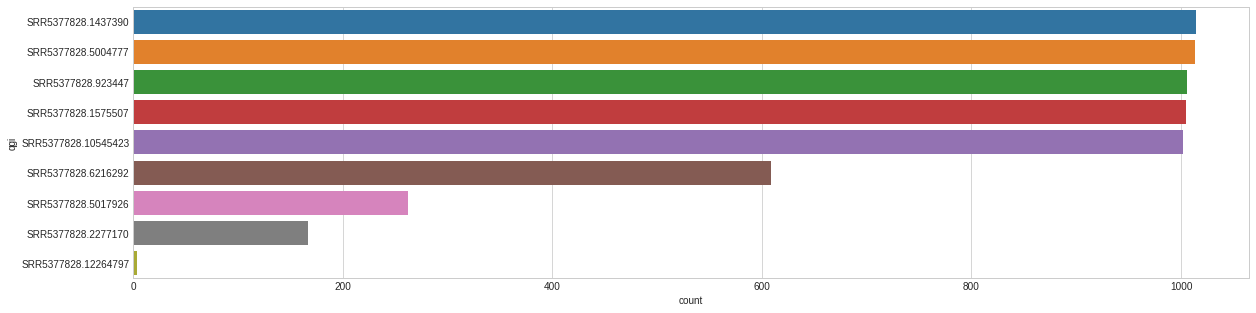

In [150]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
blast_pse = data=blast.loc[blast['sscinames'] == 'Pseudomonas aeruginosa']
sns.countplot(y="qgi", data=blast_pse, order = blast_pse["qgi"].value_counts().index);

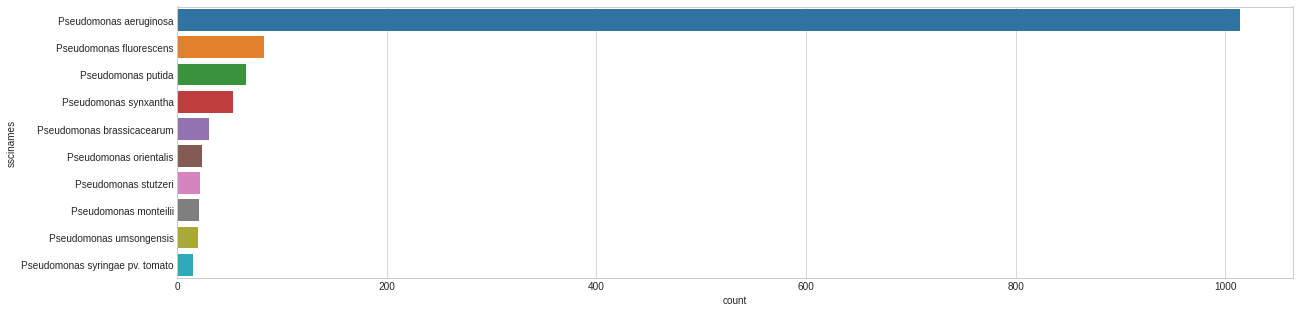

In [151]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5))
blast_srr = blast.loc[blast['qgi'] == 'SRR5377828.1437390']
sns.countplot(y="sscinames", data=blast_srr, order = blast_srr['sscinames'].value_counts().iloc[:10].index);

In [280]:
df = blast.groupby(['qgi', 'sscinames']).size().nlargest(100, keep='first').to_frame('blast hits').reset_index().sort_values(['blast hits'], ascending=False)
df

,qgi,sscinames,blast hits
0,SRR5377828.7371773,Escherichia coli,2599
1,SRR5377828.12264797,Escherichia coli,2224
2,SRR5377828.12236784,Escherichia coli,2185
3,SRR5377828.2464365,Escherichia coli,1936
4,SRR5377828.9629548,Klebsiella pneumoniae,1697
...,...,...,...
95,SRR5377828.1575507,Pseudomonas fluorescens,84
96,SRR5377828.1437390,Pseudomonas fluorescens,83
97,SRR5377828.4627422,Klebsiella pneumoniae,83
98,SRR5377828.12236784,Salmonella enterica subsp. enterica serovar An...,77


In [281]:
df[df['sscinames'].str.contains("Pseudomonas")]

,qgi,sscinames,blast hits
15,SRR5377828.1437390,Pseudomonas aeruginosa,1014
16,SRR5377828.5004777,Pseudomonas aeruginosa,1013
17,SRR5377828.923447,Pseudomonas aeruginosa,1006
18,SRR5377828.1575507,Pseudomonas aeruginosa,1005
19,SRR5377828.10545423,Pseudomonas aeruginosa,1002
25,SRR5377828.6216292,Pseudomonas aeruginosa,609
46,SRR5377828.5017926,Pseudomonas aeruginosa,262
57,SRR5377828.2277170,Pseudomonas aeruginosa,167
59,SRR5377828.2277170,Pseudomonas sp.,161
63,SRR5377828.923447,Pseudomonas putida,151
